# Module 14a - Scipy and Other Visualization Packages

## Goals

- Scipy
- Advanced vizualization tools: plotly, Mayavi, VTK, ParaView


In [1]:
import scipy as sp
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook

## Scipy

Scipy contains a large number of modules for different scientific purposes including:

### `scipy.constants`

Mathematical and physical constants ($\pi$, speed of light, avogadro's number, etc.) as well as units (time, force, energy, temperature, etc.)

https://docs.scipy.org/doc/scipy/reference/constants.html   

In [2]:
from scipy import constants
print(sp.constants.pi)
print(sp.constants.c)
print(sp.constants.h)
print(sp.constants.physical_constants['molar gas constant'])
print(sp.constants.pound_force)

3.141592653589793
299792458.0
6.62607004e-34
(8.3144598, 'J mol^-1 K^-1', 4.8e-06)
4.4482216152605


### `scipy.integrate` 

Integration of functions and ordinary differential equations

https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html

https://docs.scipy.org/doc/scipy/reference/integrate.html

In [3]:
from scipy import integrate

def f(x, A):
    return A*np.exp(-x)

A = 5
x = np.linspace(0,1,100)
y = f(x, A)
print(sp.integrate.trapz(y, x)) # integrate function given fixed samples
print(sp.integrate.quad(f, 0.0, 1.0, A)) # integrate function based on function object
print(sp.integrate.quad(f, 0.0, np.inf, A)) # use np.inf for infinity in a limit

3.16062966723
(3.1606027941427883, 3.5089739937519277e-14)
(5.0, 2.9213035440976396e-10)


Solve a differential equation of the form

\begin{equation}
\frac{dv}{dt} = f(v,t)
\end{equation}

<IPython.core.display.Javascript object>


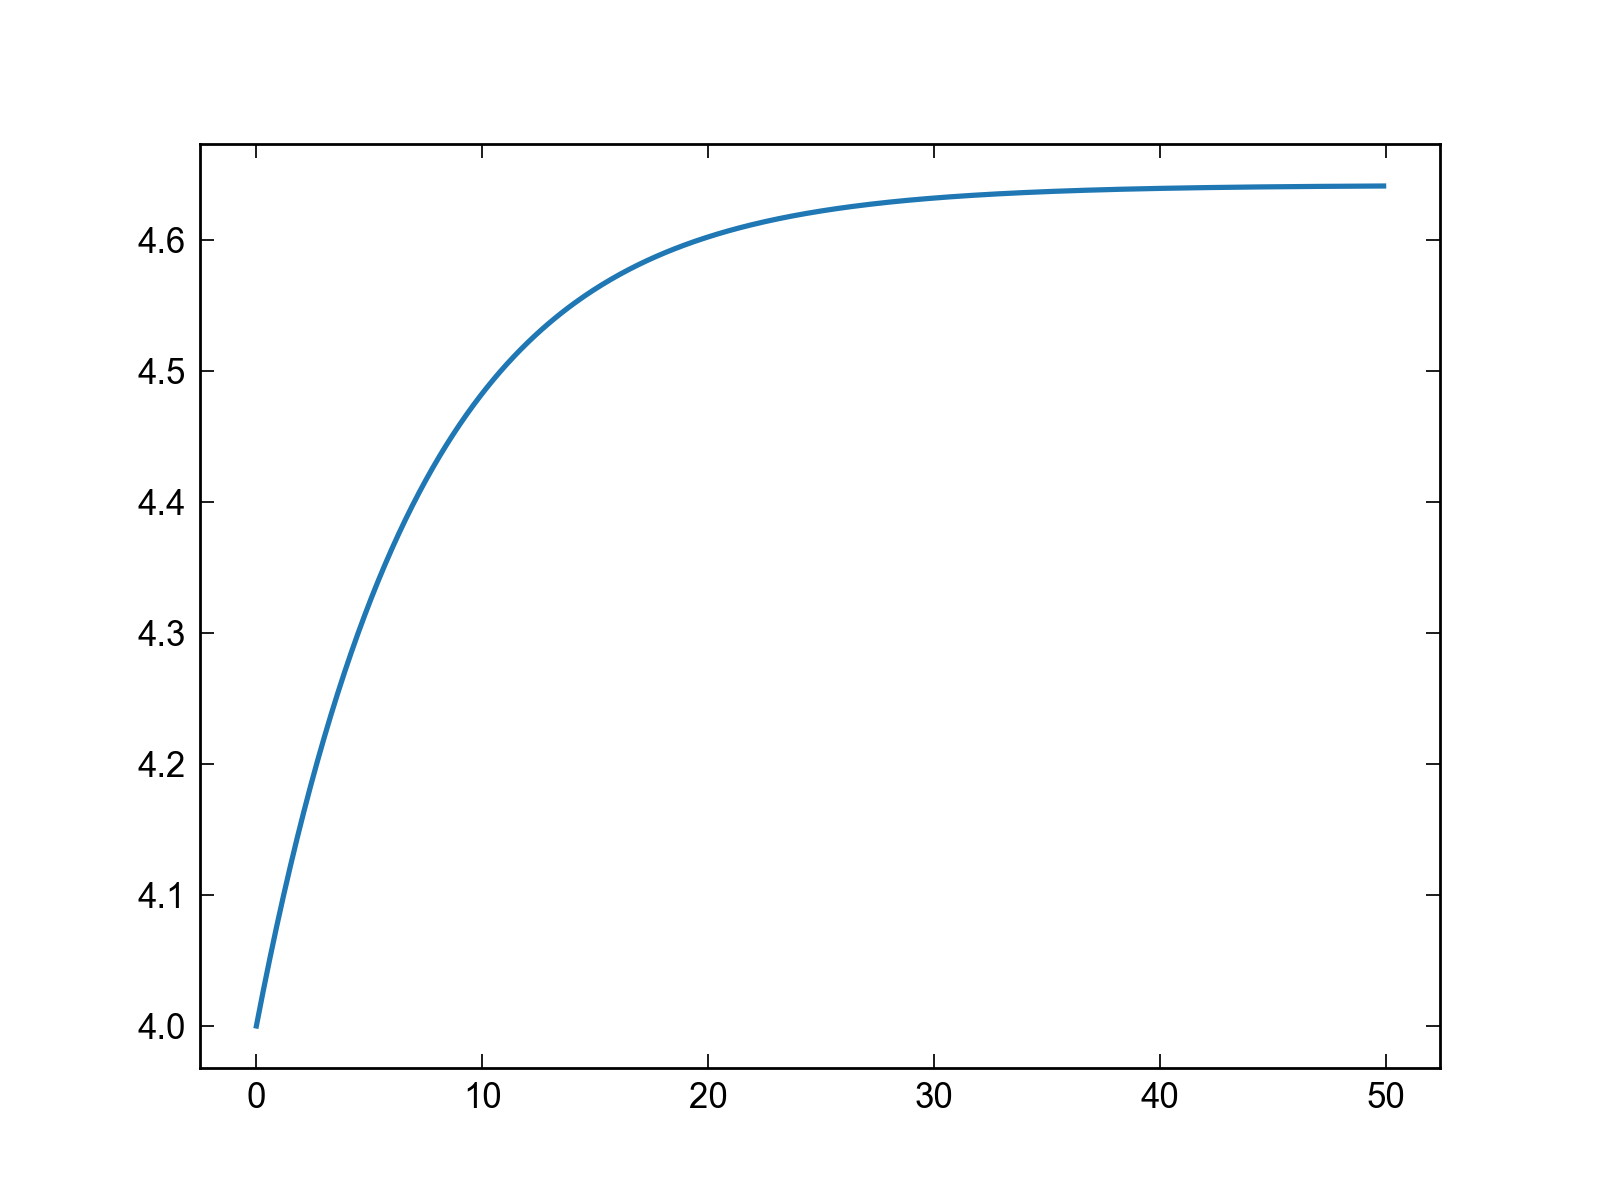

In [4]:
from scipy.integrate import odeint

def f(v,t): # function must take as input t in addition to v, even if if f() does not explicitly depend on t
    return 1.0/v - 0.01*v**2

t = np.arange(0,50,0.1)
v = sp.integrate.odeint(f, 4, t)
plt.plot(t,v)

### `scipy.optimize`

Minimization of multivariate scalar functions (simplex, conjugate gradient, etc.), global optimization, linear and non-linear least_squares minimization and data fitting, root finding

https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

https://docs.scipy.org/doc/scipy/reference/optimize.html
    
Curve fitting:

<IPython.core.display.Javascript object>


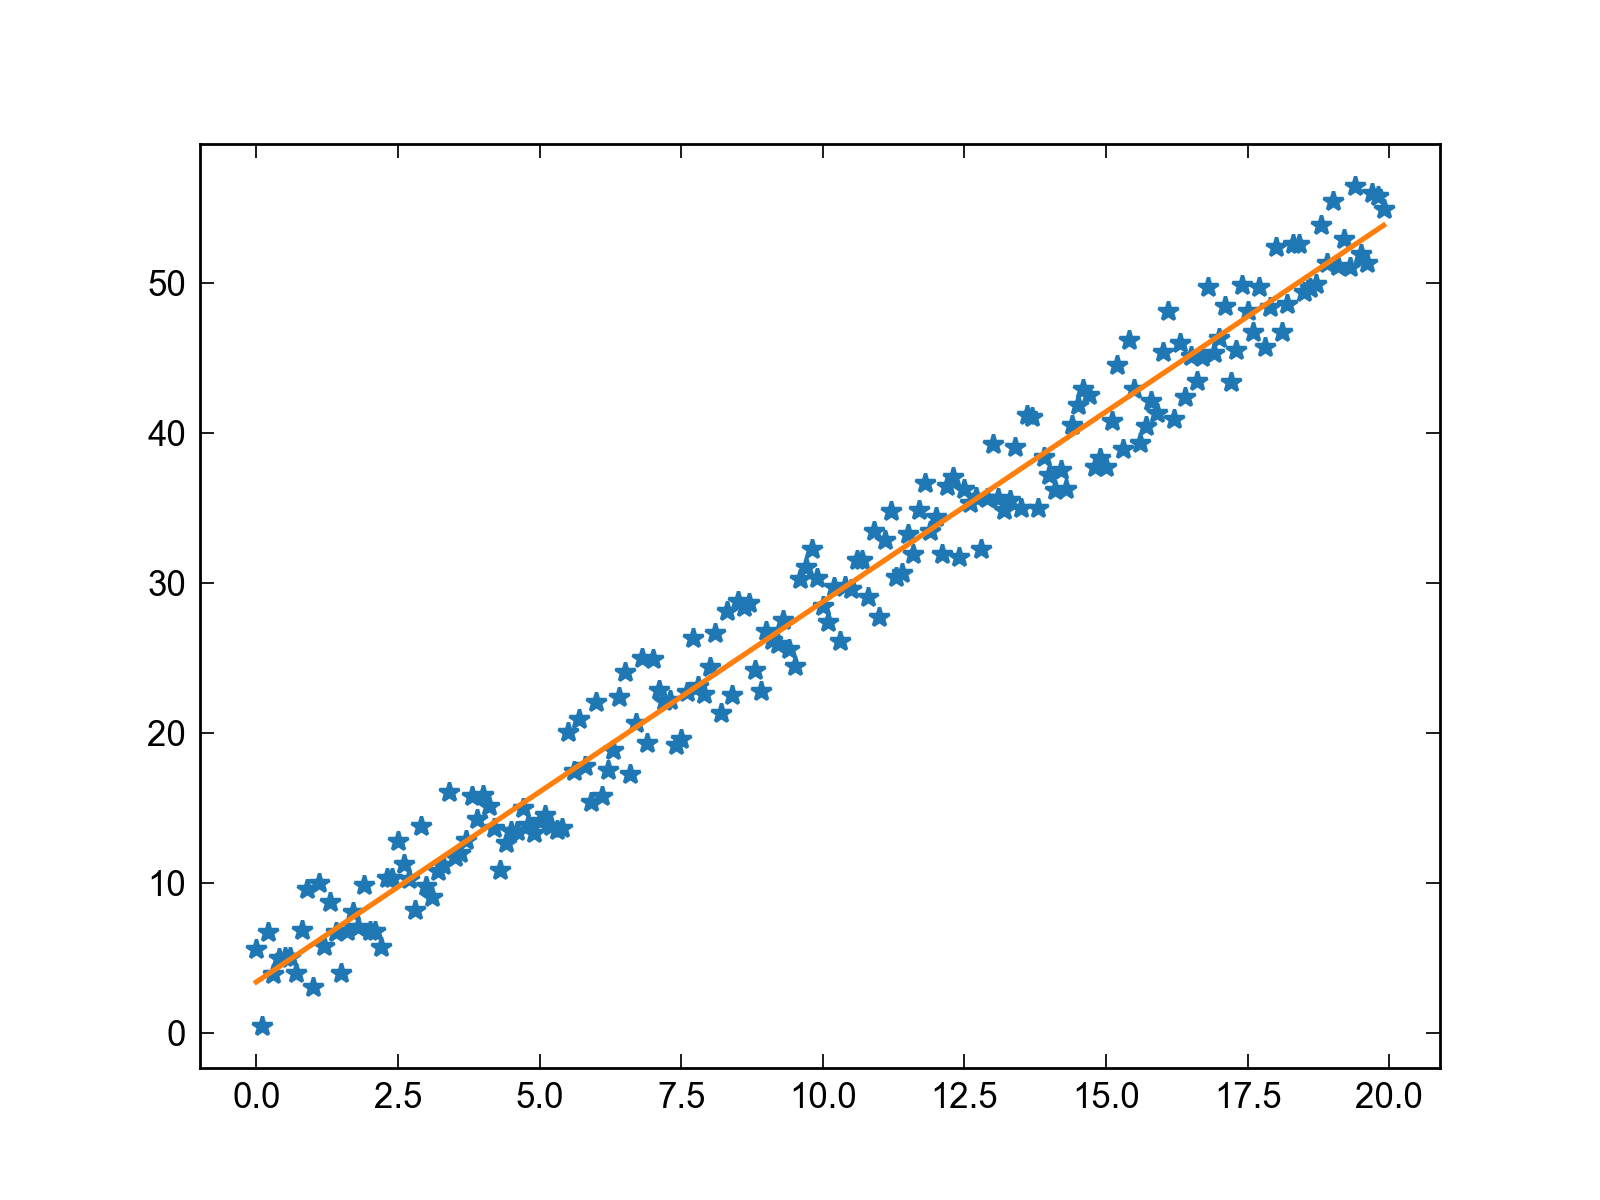

[ 2.53396507  3.3989956 ]
[[ 0.00075775 -0.00753961]
 [-0.00753961  0.10027684]]


In [5]:
from scipy import optimize
def f(x, m, b):
    return m*x + b

m = 2.5
b = 4
x = np.arange(0,20,0.1)
y = f(x, m, b)

for i in range(len(y)): # add some noise to the y data
    y[i] += 8*(np.random.random() - 0.5)

par_guess = (1,1) # initial guess for the parameters m and b
par, parcov = sp.optimize.curve_fit(f, x, y, par_guess)

plt.figure()
plt.plot(x, y, '*')
plt.plot(x, f(x,par[0], par[1]))
print(par)
print(parcov)

### `scipy.special`

Special functions such as:

- Airy functions
- Elliptic functions and integrals
- Bessel functions
- Gamma functions
- Error functions
- Orthogonal polynomials (Laguerre, Legendre, etc.)
- Combinatorics (factorials, combinations, permutations, etc.)

https://docs.scipy.org/doc/scipy/reference/tutorial/special.html

https://docs.scipy.org/doc/scipy/reference/special.html

Example - Bessel functions

<IPython.core.display.Javascript object>


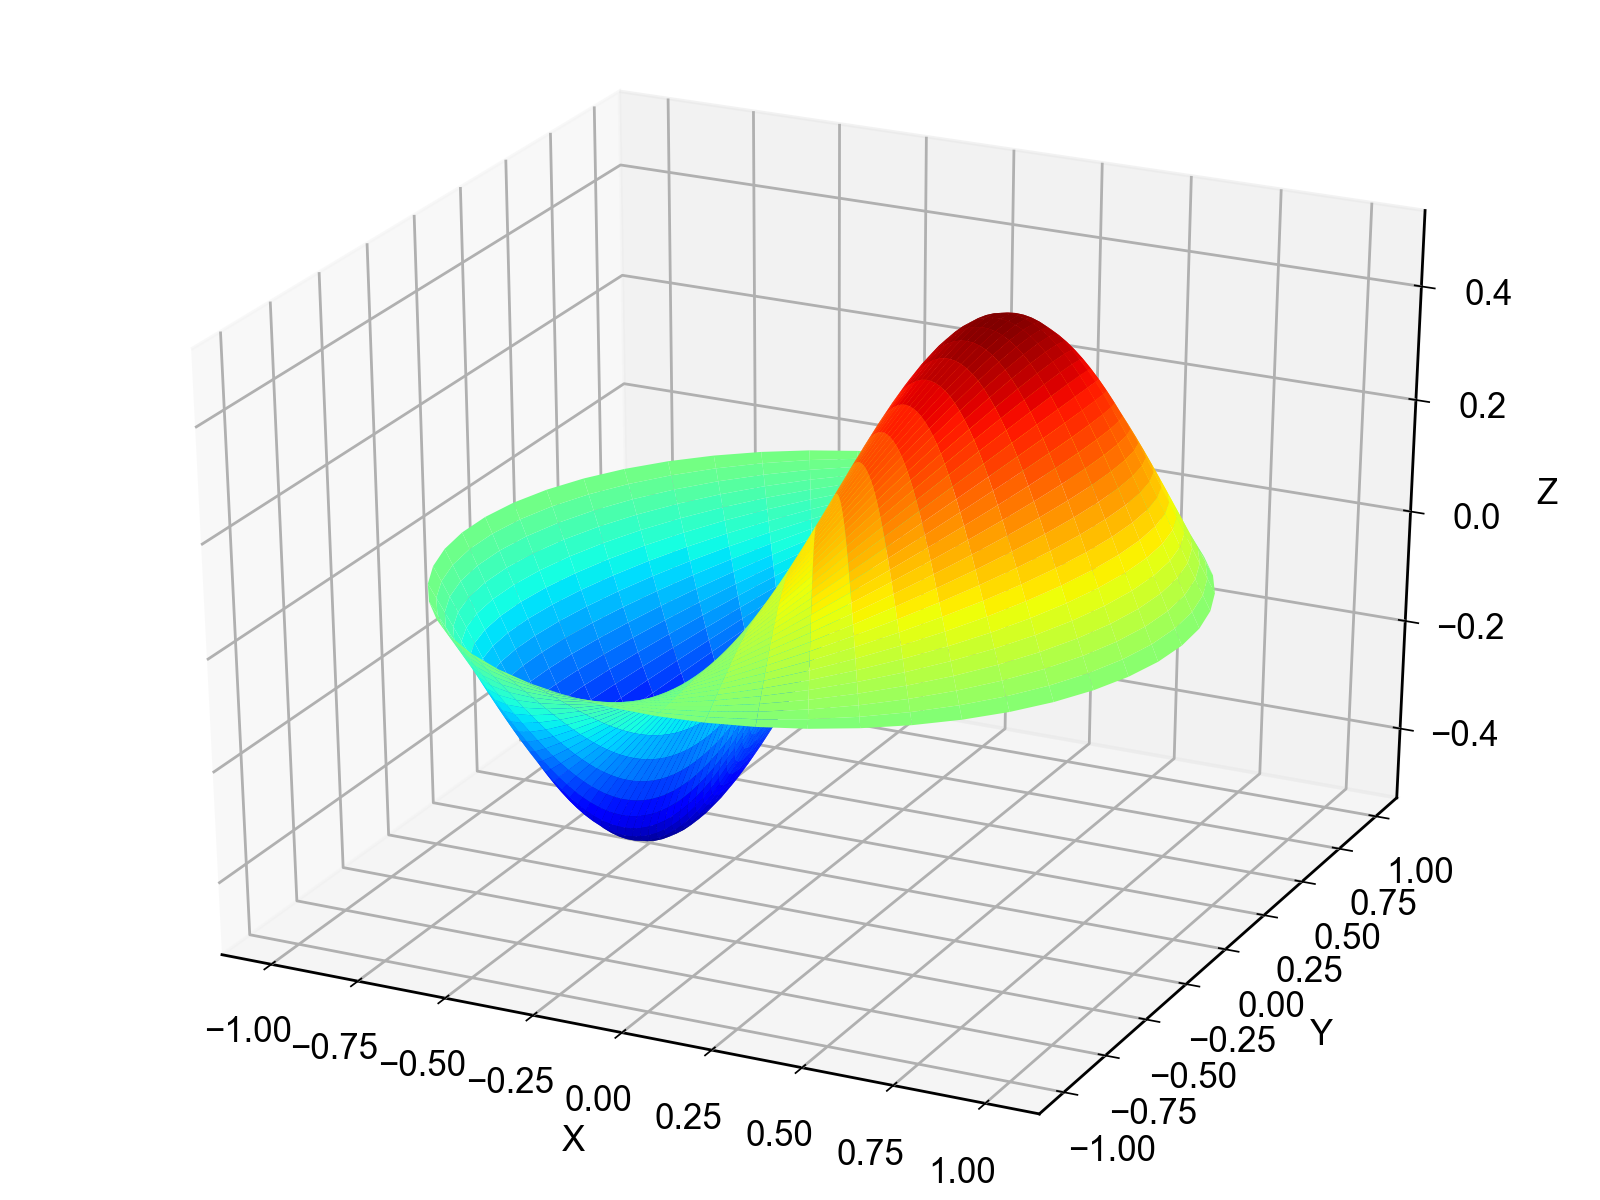

In [6]:
from scipy import special
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

def drumhead_height(n, k, distance, angle, t):
    kth_zero = special.jn_zeros(n, k)[-1]
    return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]
x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.jet)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

### `scipy.interpolate`

Linear and spline interpolation of multivariate data.

https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

https://docs.scipy.org/doc/scipy/reference/interpolate.html

<IPython.core.display.Javascript object>


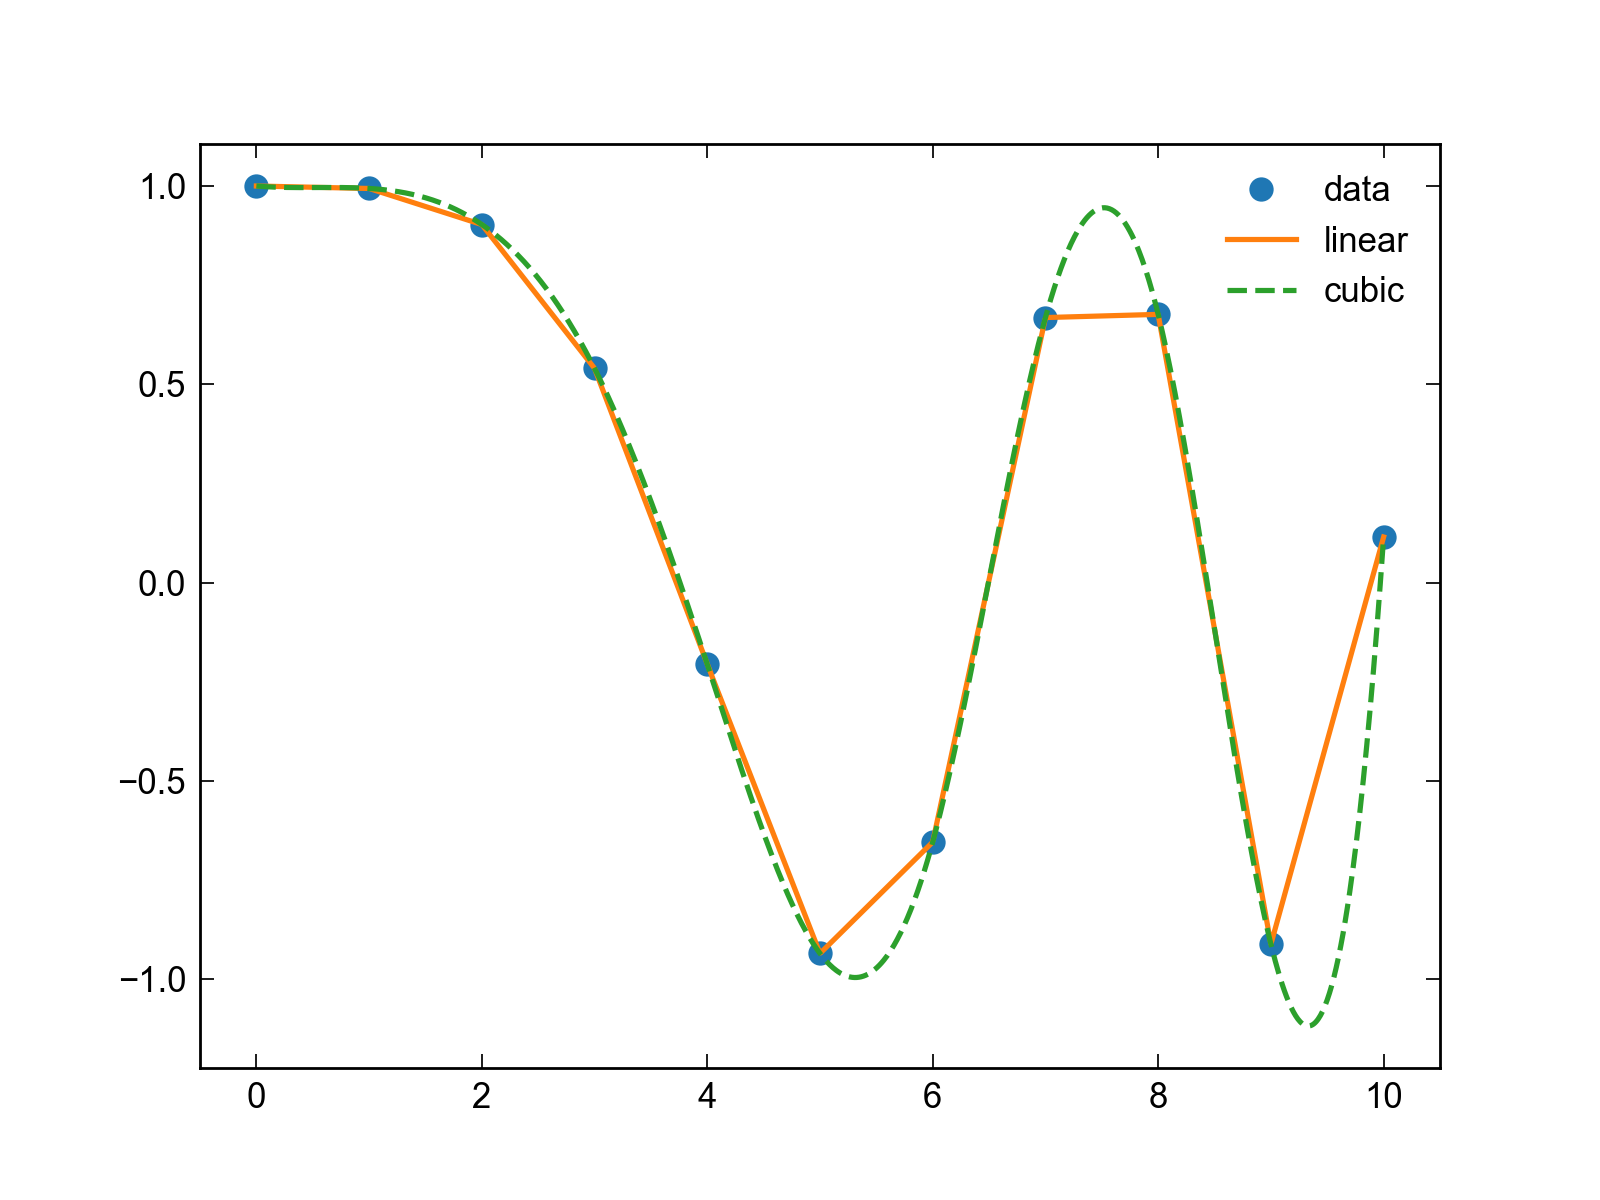

In [7]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

f = interp1d(x, y) # create simple linear interpolation
f2 = interp1d(x, y, kind='cubic') # cubic interpolation

xnew = np.linspace(0, 10, 1000, endpoint=True)

plt.figure()
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

### `scipy.signal` and `scipy.ndimage`

Signal and multi-dimensional image processing:
- Filtering
- Convolutions
- Correlations
- Spectral analysis

https://docs.scipy.org/doc/scipy/reference/tutorial/signal.html

https://docs.scipy.org/doc/scipy/reference/signal.html

https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html

https://docs.scipy.org/doc/scipy/reference/signal.html

Example gaussian filtering of 2-dimensional data using `scipy.ndimage.filters.gaussian_filter`:

<img src="data/graphene_stonewales_2.png" width=600px>

### `scipy.linalg` and `scipy.sparse`

Linear algebra and sparce matrices. `scipy.linalg` contains all the functions in `numpy.linalg` with some addditional advanced funtions. Also, `scipy.linalg` is always compiled with BLAS/LAPACK support and therefore is often faster than the numpy equivalent.

- Basic matrix and vector algebra
- Matrix equation solvers
- Eigenvalue problems
- Decompositions

https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

https://docs.scipy.org/doc/scipy/reference/linalg.html

https://docs.scipy.org/doc/scipy/reference/sparse.html



### `scipy.fftpack`

Discrete Fast Fourier Transforms

https://docs.scipy.org/doc/scipy/reference/tutorial/fftpack.html

https://docs.scipy.org/doc/scipy/reference/fftpack.html

## Plotly

https://plot.ly/python/

## Mayavi

http://docs.enthought.com/mayavi/mayavi/

## VTK

https://www.vtk.org/
https://lorensen.github.io/VTKExamples/site/Python/

In [8]:
import vtk
# The colors module defines various useful colors.
from vtk.util.colors import tomato

# This creates a polygonal cylinder model with eight circumferential
# facets.
cylinder = vtk.vtkCylinderSource()
cylinder.SetResolution(8)

# The mapper is responsible for pushing the geometry into the graphics
# library. It may also do color mapping, if scalars or other
# attributes are defined.
cylinderMapper = vtk.vtkPolyDataMapper()
cylinderMapper.SetInputConnection(cylinder.GetOutputPort())

# The actor is a grouping mechanism: besides the geometry (mapper), it
# also has a property, transformation matrix, and/or texture map.
# Here we set its color and rotate it -22.5 degrees.
cylinderActor = vtk.vtkActor()
cylinderActor.SetMapper(cylinderMapper)
cylinderActor.GetProperty().SetColor(tomato)
cylinderActor.RotateX(30.0)
cylinderActor.RotateY(-45.0)

# Create the graphics structure. The renderer renders into the render
# window. The render window interactor captures mouse events and will
# perform appropriate camera or actor manipulation depending on the
# nature of the events.
ren = vtk.vtkRenderer()
renWin = vtk.vtkRenderWindow()
renWin.AddRenderer(ren)
iren = vtk.vtkRenderWindowInteractor()
iren.SetRenderWindow(renWin)

# Add the actors to the renderer, set the background and size
ren.AddActor(cylinderActor)
ren.SetBackground(0.1, 0.2, 0.4)
renWin.SetSize(200, 200)

# This allows the interactor to initalize itself. It has to be
# called before an event loop.
iren.Initialize()

# We'll zoom in a little by accessing the camera and invoking a "Zoom"
# method on it.
ren.ResetCamera()
ren.GetActiveCamera().Zoom(1.5)
renWin.Render()

# Start the event loop.
iren.Start()

In [1]:
import vtk

class CurvaturesDemo():

    def CurvaturesDemo(self):

        # We are going to handle two different sources.
        # The first source is a superquadric source.
        torus = vtk.vtkSuperquadricSource();
        torus.SetCenter(0.0, 0.0, 0.0)
        torus.SetScale(1.0, 1.0, 1.0)
        torus.SetPhiResolution (64)
        torus.SetThetaResolution(64)
        torus.SetThetaRoundness (1)
        torus.SetThickness (0.5)
        torus.SetSize(0.5)
        torus.SetToroidal(1) 

        # Rotate the torus towards the observer (around the x-axis)
        torusT = vtk.vtkTransform()
        torusT.RotateX(55)

        torusTF = vtk.vtkTransformFilter()
        torusTF.SetInputConnection(torus.GetOutputPort())
        torusTF.SetTransform(torusT)

        # The quadric is made of strips, so pass it through a triangle filter as
        # the curvature filter only operates on polys
        tri = vtk.vtkTriangleFilter()
        tri.SetInputConnection(torusTF.GetOutputPort())

        # The quadric has nasty discontinuities from the way the edges are generated
        # so let's pass it though a CleanPolyDataFilter and merge any points which
        # are coincident, or very close

        cleaner = vtk.vtkCleanPolyData()
        cleaner.SetInputConnection(tri.GetOutputPort())
        cleaner.SetTolerance(0.005)

        # The next source will be a parametric function
        rh = vtk.vtkParametricRandomHills()
        rhFnSrc = vtk.vtkParametricFunctionSource()
        rhFnSrc.SetParametricFunction(rh)

        # Now we have the sources, lets put them into a list.
        sources = list()
        sources.append(cleaner)
        sources.append(cleaner)
        sources.append(rhFnSrc)
        sources.append(rhFnSrc)

        # Colour transfer function.
        ctf = vtk.vtkColorTransferFunction()
        ctf.SetColorSpaceToDiverging()
        ctf.AddRGBPoint(0.0, 0.230, 0.299, 0.754)
        ctf.AddRGBPoint(1.0, 0.706, 0.016, 0.150)
        cc = list()
        for i in range(256):
            cc.append(ctf.GetColor(float(i) / 255.0)) 

        # Lookup table.
        lut = list()
        for idx in range(len(sources)):
            lut.append(vtk.vtkLookupTable())
            lut[idx].SetNumberOfColors(256)
            for i, item in enumerate(cc):
                lut[idx].SetTableValue(i, item[0], item[1], item[2], 1.0)
            if idx == 0:
                lut[idx].SetRange(-10, 10)
            if idx == 1:
                lut[idx].SetRange(0, 4)
            if idx == 2:
                lut[idx].SetRange(-1, 1)
            if idx == 3:
                lut[idx].SetRange(-1, 1)
            lut[idx].Build()

        curvatures = list()        
        for idx in range(len(sources)):
            curvatures.append(vtk.vtkCurvatures())
            if idx % 2 == 0:
                curvatures[idx].SetCurvatureTypeToGaussian()
            else:
                curvatures[idx].SetCurvatureTypeToMean()

        renderers = list()
        mappers = list()
        actors = list()
        textmappers = list()
        textactors = list()

        # Create a common text property.
        textProperty = vtk.vtkTextProperty()
        textProperty.SetFontSize(10)
        textProperty.SetJustificationToCentered()

        names = ['Torus - Gaussian Curvature', 'Torus - Mean Curvature', 'Random Hills - Gaussian Curvature', 'Random Hills - Mean Curvature']

        # Link the pipeline together. 
        for idx, item in enumerate(sources):
            sources[idx].Update()

            curvatures[idx].SetInputConnection(sources[idx].GetOutputPort())

            mappers.append(vtk.vtkPolyDataMapper())
            mappers[idx].SetInputConnection(curvatures[idx].GetOutputPort())
            mappers[idx].SetLookupTable(lut[idx])
            mappers[idx].SetUseLookupTableScalarRange(1)

            actors.append(vtk.vtkActor())
            actors[idx].SetMapper(mappers[idx])

            textmappers.append(vtk.vtkTextMapper())
            textmappers[idx].SetInput(names[idx])
            textmappers[idx].SetTextProperty(textProperty)

            textactors.append(vtk.vtkActor2D())
            textactors[idx].SetMapper(textmappers[idx])
            textactors[idx].SetPosition(150, 16)

            renderers.append(vtk.vtkRenderer())

        gridDimensions = 2

        for idx in range(len(sources)):
            if idx < gridDimensions * gridDimensions:
                renderers.append(vtk.vtkRenderer)

        rendererSize = 300

        # Create the RenderWindow
        #
        renderWindow = vtk.vtkRenderWindow()
        renderWindow.SetSize(rendererSize * gridDimensions, rendererSize * gridDimensions)

        # Add and position the renders to the render window.
        viewport = list()
        for row in range(gridDimensions):
            for col in range(gridDimensions):
                idx = row * gridDimensions + col

                viewport[:] = []
                viewport.append(float(col) * rendererSize / (gridDimensions * rendererSize))
                viewport.append(float(gridDimensions - (row+1)) * rendererSize / (gridDimensions * rendererSize))
                viewport.append(float(col+1)*rendererSize / (gridDimensions * rendererSize))
                viewport.append(float(gridDimensions - row) * rendererSize / (gridDimensions * rendererSize))

                if idx > (len(sources) - 1):
                    continue

                renderers[idx].SetViewport(viewport)
                renderWindow.AddRenderer(renderers[idx])

                renderers[idx].AddActor(actors[idx])
                renderers[idx].AddActor(textactors[idx])
                renderers[idx].SetBackground(0.4,0.3,0.2)

        interactor = vtk.vtkRenderWindowInteractor()
        interactor.SetRenderWindow(renderWindow)

        renderWindow.Render()

        interactor.Start()

if __name__ == "__main__":
    po = CurvaturesDemo()
    po.CurvaturesDemo()